# 1. Import Libraries

In [1]:
# Import the required libraries
import numpy as np
import random

# Import sklearn libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import the HyperparameterOptimizer library
from hyperparameter_optimizer import HyperparameterOptimizer as HO

# 2. Hyperparameter Optimizer - Classification Example

In [2]:
# Set the random seed
random.seed(0)
np.random.seed(0)

## 2.1. Load the Dataset - Cancer Dataset

In [3]:
# Import the SVC library
from sklearn.svm import SVC

# Load the data
cancer = datasets.load_breast_cancer()
cancer_features, cancer_target = cancer.data, cancer.target

# Split the data into training and testing sets
cancer_features_train, cancer_features_test, cancer_target_train, cancer_target_test = train_test_split(cancer_features, cancer_target, test_size=0.2, random_state=0)

## 2.2. Create the Pipeline

In [4]:
# Create a pipeline to standardize and run SVC
svc_steps = [("scaler", MinMaxScaler()), ("svm", SVC())]
svc_pipeline = Pipeline(svc_steps)

## 2.3. Prepare for Hyperparameter Optimization

In [6]:
# Create a parameters dictionary - no need to specify hyperparameter values
svc_params = {'svm__C': [],
            'svm__gamma': [],
            'svm__kernel': []}

# Create an instance of the HyperparameterOptimizer class
G = HO(svc_pipeline, svc_params, "accuracy")

# Optimize the hyperparameterst
y = G.optimizePS(cancer_features_train,     # Training Features
                 cancer_target_train,       # Training Target
                 nParticles=10,             # Number of particles
                 bounds=[(0.00001, 5000.00), (0.00001, 5000.00),['linear', 'poly', 'rbf', 'sigmoid']],  # Bounds for C, gamma, and kernel
                 w=0.5,                     # Inertia weight
                 c1=2,                      # Cognitive weight
                 c2=2,                      # Social weight
                 maxIter=75,                # Maximum number of iterations
                 mutation_prob=0.7)         # Mutation probability -- for discrete hyperparameters (e.g., kernel)

PS hyperparameter optimization has started . . .
Initializing Global Best Position and Score . . .
Initializing Swarm Particles . . .
Starting Optimization Main Loop . . .
Iteration #1
Corresponding Optimal Solution: [3430.5562575945332 4899.655050594009 'linear']
Corresponding Optimum: 0.9648351648351647
------
Iteration #2
Corresponding Optimal Solution: [3430.5562575945332 4899.655050594009 'linear']
Corresponding Optimum: 0.9648351648351647
------
Iteration #3
Corresponding Optimal Solution: [3430.5562575945332 4899.655050594009 'linear']
Corresponding Optimum: 0.9648351648351647
------
Iteration #4
Corresponding Optimal Solution: [3430.5562575945332 4899.655050594009 'linear']
Corresponding Optimum: 0.9648351648351647
------
Iteration #5
Corresponding Optimal Solution: [1758.6603769580943 5000.0 'linear']
Corresponding Optimum: 0.9670329670329669
------
Iteration #6
Corresponding Optimal Solution: [1758.6603769580943 5000.0 'linear']
Corresponding Optimum: 0.9670329670329669
-----

## 2.4. Plot the Results 

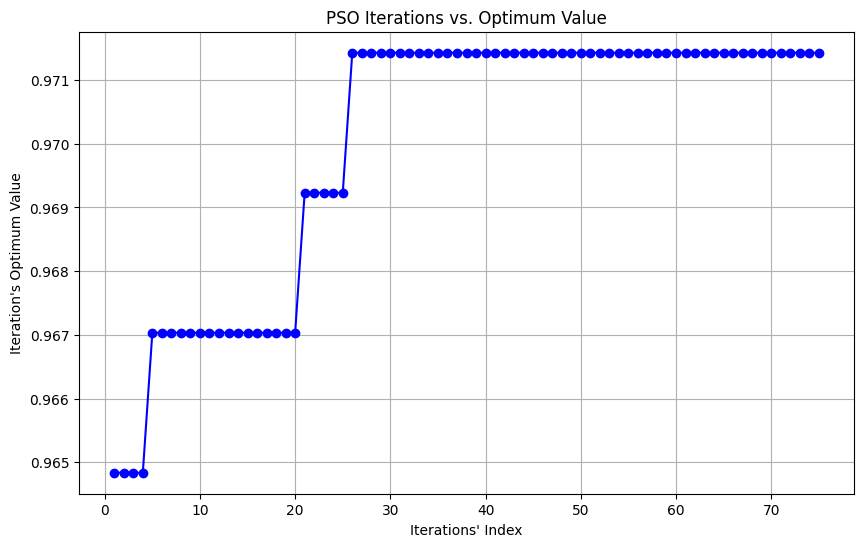

In [7]:
def plot_ps_iter_opt_sols(ps_iter_opt_sols):
    iterations_index = ps_iter_opt_sols["Iterations' Index"]
    iterations_optimum_value = ps_iter_opt_sols["Iteration's Optimum Value"]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations_index, iterations_optimum_value, marker='o', linestyle='-', color='b')
    plt.title("PSO Iterations vs. Optimum Value")
    plt.xlabel("Iterations' Index")
    plt.ylabel("Iteration's Optimum Value")
    plt.grid(True)
    plt.show()

plot_ps_iter_opt_sols(G.PS_iterOptSols)

## 2.5. Print the Results

In [8]:
# Access the algorithm's attributes
print(G.PS_attritbutes)

{'Number of Iterations': 75, 'Number of Particles': 10, 'Inertia Weight': 0.5, 'Cognitive Weight': 2, 'Social Weight': 2}


In [9]:
# Access the algorithm's particles
print(G.PS_Particles)

[{'position': array([501.68733156546193, 4883.1003413217995, 'poly'], dtype=object), 'velocity': array([68.11181948348215, -6.776681293167112, 0], dtype=object), 'best_position': array([433.5755120819798, 4889.877022614966, 'linear'], dtype=object), 'best_score': 0.9714285714285713}, {'position': array([321.00646183123683, 4785.492292534047, 'linear'], dtype=object), 'velocity': array([-182.5955889134011, -119.26123214025864, 0], dtype=object), 'best_position': array([379.2285783615828, 4838.446259335452, 'linear'], dtype=object), 'best_score': 0.9714285714285713}, {'position': array([312.2239249734008, 4880.090102124076, 'linear'], dtype=object), 'velocity': array([-159.56617760406456, -16.081266719587983, 0], dtype=object), 'best_position': array([390.33199843013927, 4990.420647490957, 'linear'], dtype=object), 'best_score': 0.9714285714285713}, {'position': array([466.36205089513896, 4881.76000537018, 'poly'], dtype=object), 'velocity': array([19.802692024295567, -4.256157406240401,

In [10]:
# Access the iterations' optimum solutions history
print(G.PS_iterOptSols)

{"Iterations' Index": array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75]), "Iteration's Optimum Value": [0.9648351648351647, 0.9648351648351647, 0.9648351648351647, 0.9648351648351647, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9670329670329669, 0.9692307692307691, 0.9692307692307691, 0.9692307692307691, 0.9692307692307691, 0.9692307692307691, 0.9714285714285713, 0.9714285714285713, 0.9714285714285713, 0.9714285714285713, 0.9714285714285713, 0.971428571

In [11]:
# Access the final optimal solution
print(G.PS_finalOptimalSol)

{"Optimal Solution Variables' Values": array([451.9028566696493, 4885.415737381233, 'linear'], dtype=object), 'Optimal Solution Value': 0.9714285714285713}


## 2.6. Train the Model
The model is trained using the optimized hyperparameter values.

In [12]:
# Get the optimal hyperparameter values
C_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][0]
gamma_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][1]
kernel_optimal = G.PS_finalOptimalSol["Optimal Solution Variables' Values"][2]

# Create a pipeline with the optimal hyperparameters
svc_steps = [("scaler", MinMaxScaler()), ("svm", SVC(C=C_optimal, gamma=gamma_optimal, kernel=kernel_optimal))]
svc_pipeline = Pipeline(svc_steps)

# Train the pipeline
svc_pipeline.fit(cancer_features_train, cancer_target_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=451.9028566696493, gamma=4885.415737381233,
                     kernel='linear'))])

## 2.7. Test the Results

In [13]:
# Import the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the target values
cancer_y_pred = svc_pipeline.predict(cancer_features_test)

### 2.7.1. Accuracy

In [14]:
# Calculate the Accuracy
cancer_accuracy = accuracy_score(cancer_target_test, cancer_y_pred)
print(f"Accuracy: {cancer_accuracy:.2f}")

Accuracy: 0.96


### 2.7.2. Confusion Matrix

In [15]:
# Calculate the Confusion Matrix
conf_matrix = confusion_matrix(cancer_target_test, cancer_y_pred)

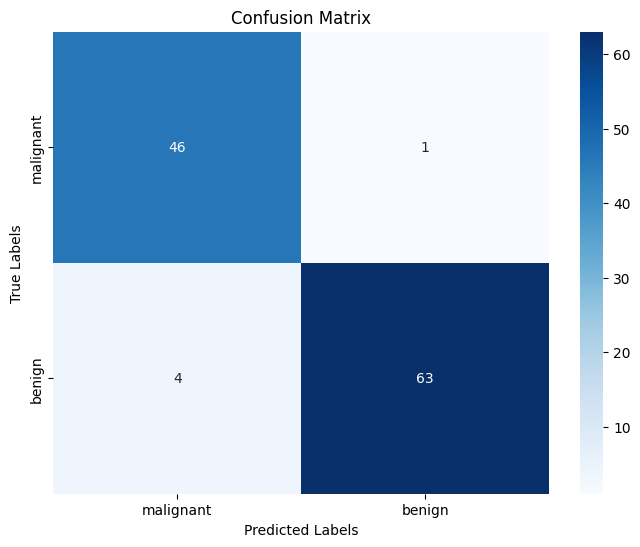

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2.7.3. Classification Report

In [17]:
# Classification Report
print("\nClassification Report:")
print(classification_report(cancer_target_test, cancer_y_pred, target_names=cancer.target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.98      0.95        47
      benign       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# 3. Hyperparameter Optimizer - Regression Example

In [18]:
# Set the random seed
random.seed(7)
np.random.seed(7)

## 3.1. Load the Dataset - Diabetes Dataset

In [19]:
from sklearn.datasets import load_diabetes

# Load the data
diabetes = load_diabetes()
diabetes_features, diabetes_target = diabetes.data, diabetes.target

# Split the data into training and testing sets
diabetes_features_train, diabetes_features_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes_features, diabetes_target, test_size=0.2, random_state=0)

## 3.2. Create the Pipeline

In [20]:
# Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Pipeline to Standardize and Run Logistic Regression
rf_steps = [("scaler", StandardScaler()),("rfr", RandomForestRegressor(random_state=0, n_jobs=-1))]
rf_pipeline = Pipeline(rf_steps)

## 3.3. Prepare for Hyperparameter Optimization

In [21]:
# Create a Parameters Dictionary
rf_params = {"rfr__max_features": [],
            "rfr__max_depth": [],
            "rfr__min_samples_split": [],
            "rfr__min_samples_leaf": [],
            "rfr__n_estimators": []}


G2 = HO(rf_pipeline, rf_params, "r2")
y2 = G2.optimizePS(diabetes_features_train,                                 # Training Features
                 diabetes_target_train,                                     # Training Target
                 nParticles=3, 
                 bounds=[(1, 10), (1, 10), (2, 20), (1, 15), (50,500)],     # Bounds for max_features, max_depth, min_samples_split, min_samples_leaf, and n_estimators
                 w=0.5,                                                     # Inertia weight
                 c1=2,                                                      # Cognitive weight
                 c2=2,                                                      # Social weight
                 maxIter=30)                                                # Maximum number of iterationsy

PS hyperparameter optimization has started . . .
Initializing Global Best Position and Score . . .
Initializing Swarm Particles . . .
Starting Optimization Main Loop . . .
Iteration #1
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #2
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #3
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #4
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #5
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #6
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #7
Corresponding Optimal Solution: [1 10 2 15 50]
Corresponding Optimum: 0.3907013821323505
------
Iteration #8
Corresponding Optimal Solution: [1 10 2 15 50]
Corre

## 3.4. Plot the Results

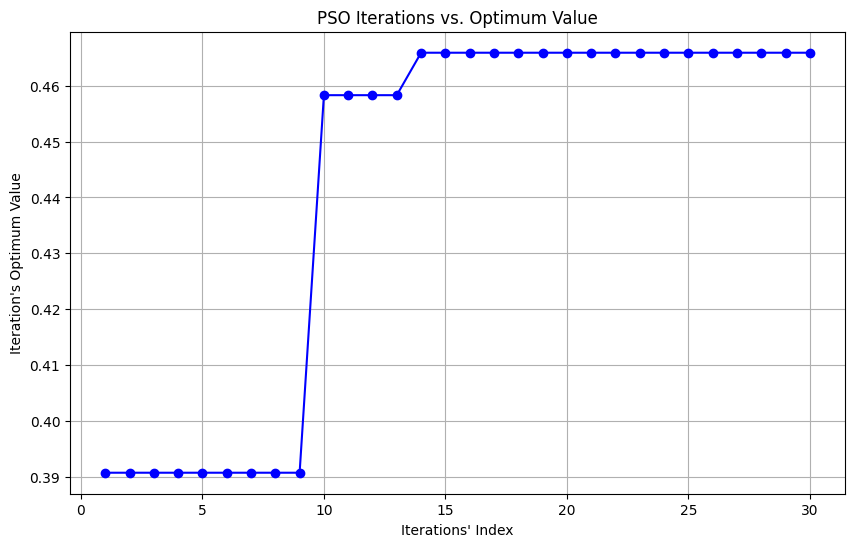

In [22]:
def plot_ps_iter_opt_sols(ps_iter_opt_sols):
    iterations_index = ps_iter_opt_sols["Iterations' Index"]
    iterations_optimum_value = ps_iter_opt_sols["Iteration's Optimum Value"]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations_index, iterations_optimum_value, marker='o', linestyle='-', color='b')
    plt.title("PSO Iterations vs. Optimum Value")
    plt.xlabel("Iterations' Index")
    plt.ylabel("Iteration's Optimum Value")
    plt.grid(True)
    plt.show()

plot_ps_iter_opt_sols(G2.PS_iterOptSols)

## 3.5. Print the Results

In [23]:
print(G2.PS_attritbutes)

{'Number of Iterations': 30, 'Number of Particles': 3, 'Inertia Weight': 0.5, 'Cognitive Weight': 2, 'Social Weight': 2}


In [24]:
print(G2.PS_Particles)

[{'position': array([10, 10, 2, 1, 500], dtype=object), 'velocity': array([0, 0, 0, 0, 0], dtype=object), 'best_position': array([10, 10, 2, 1, 500], dtype=object), 'best_score': 0.4659225462317448}, {'position': array([10, 1, 2, 1, 500], dtype=object), 'velocity': array([0, 0, 0, 0, 0], dtype=object), 'best_position': array([10, 10, 2, 1, 500], dtype=object), 'best_score': 0.4659225462317448}, {'position': array([1, 1, 2, 15, 50], dtype=object), 'velocity': array([0, 0, 0, 0, 0], dtype=object), 'best_position': array([10, 10, 2, 15, 50], dtype=object), 'best_score': 0.4508040500679248}]


In [25]:
print(G2.PS_iterOptSols)

{"Iterations' Index": array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), "Iteration's Optimum Value": [0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.3907013821323505, 0.4583186362642794, 0.4583186362642794, 0.45831863626427943, 0.45831863626427943, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448, 0.4659225462317448]}


In [26]:
print(G2.PS_finalOptimalSol)

{"Optimal Solution Variables' Values": array([10, 10, 2, 1, 500], dtype=object), 'Optimal Solution Value': 0.4659225462317448}


## 3.6. Train the Model
The model is trained using the optimized hyperparameter values.

In [27]:
# Get the optimal hyperparameter values
max_features_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][0]
max_depth_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][1]
min_samples_split_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][2]
min_samples_leaf_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][3]
n_estimators_optimal = G2.PS_finalOptimalSol["Optimal Solution Variables' Values"][4]

# Create a pipeline with the optimal hyperparameters
rf_steps = [("scaler", StandardScaler()),("rfr", RandomForestRegressor(random_state=0, n_jobs=-1, 
                                                                      max_features=max_features_optimal, 
                                                                      max_depth=max_depth_optimal, 
                                                                      min_samples_split=min_samples_split_optimal, 
                                                                      min_samples_leaf=min_samples_leaf_optimal, 
                                                                      n_estimators=n_estimators_optimal))]
rf_pipeline = Pipeline(rf_steps)

# Train the pipeline
rf_pipeline.fit(diabetes_features_train, diabetes_target_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=10, max_features=10,
                                       n_estimators=500, n_jobs=-1,
                                       random_state=0))])

## 3.7. Test the Results

In [28]:
# Import the required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the target values
diabetes_y_pred = rf_pipeline.predict(diabetes_features_test)

In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(diabetes_target_test, diabetes_y_pred)
mae = mean_absolute_error(diabetes_target_test, diabetes_y_pred)
r2 = r2_score(diabetes_target_test, diabetes_y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3775.36
Mean Absolute Error (MAE): 48.03
R² Score: 0.26
